In [7]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import itertools
import timeit

%matplotlib inline
data1 = pd.read_csv("data/phishing_websites.csv")
data2 = pd.read_csv("data/online_shoppers_intention.csv")
data1.drop(['id'], axis=1, inplace=True)
data2 = data2.dropna()

In [14]:
data22 = pd.read_csv("data/online_shoppers_intention.csv")
df = data22[data22['VisitorType']== 'Other']
df.head(80)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5679,0,0.000,4,225.766667,222,9630.209524,0.053355,0.066159,0.000000,0.0,June,8,13,9,5,Other,False,False
8006,5,446.250,0,0.000000,18,815.250000,0.000000,0.002500,0.000000,0.0,Dec,8,13,9,20,Other,False,False
8105,0,0.000,0,0.000000,8,493.750000,0.000000,0.050000,0.000000,0.0,Nov,2,2,4,20,Other,False,False
8115,0,0.000,0,0.000000,7,87.000000,0.000000,0.028571,0.000000,0.0,Dec,8,13,9,20,Other,False,False
8187,0,0.000,0,0.000000,4,129.500000,0.000000,0.050000,0.000000,0.0,Dec,8,13,9,20,Other,False,False
8299,0,0.000,0,0.000000,6,222.000000,0.000000,0.040000,87.902961,0.0,Dec,8,13,9,20,Other,False,True
8319,0,0.000,0,0.000000,3,59.000000,0.000000,0.066667,0.000000,0.0,Dec,1,1,3,2,Other,False,False
8328,5,60.500,0,0.000000,5,50.000000,0.000000,0.025000,0.000000,0.0,Dec,8,13,9,20,Other,True,True
8339,3,65.000,0,0.000000,29,386.262121,0.000000,0.000667,0.000000,0.0,Nov,8,2,9,2,Other,False,False
8368,5,1652.000,0,0.000000,15,446.375000,0.000000,0.005882,0.000000,0.0,Dec,8,13,9,20,Other,False,False


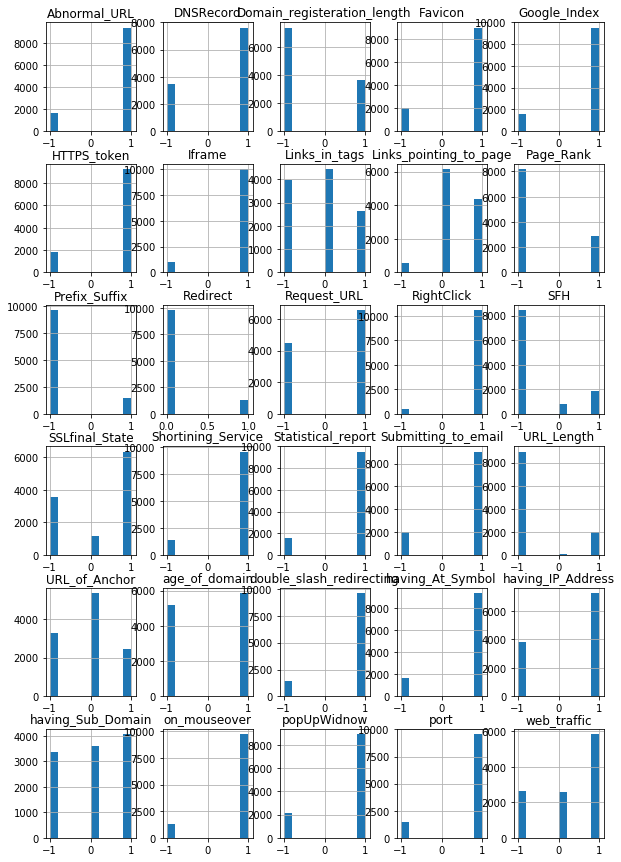

In [31]:
data1.drop(['Result'], axis=1).hist(figsize=(10,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46b4ae8f60>,
      dtype=object)

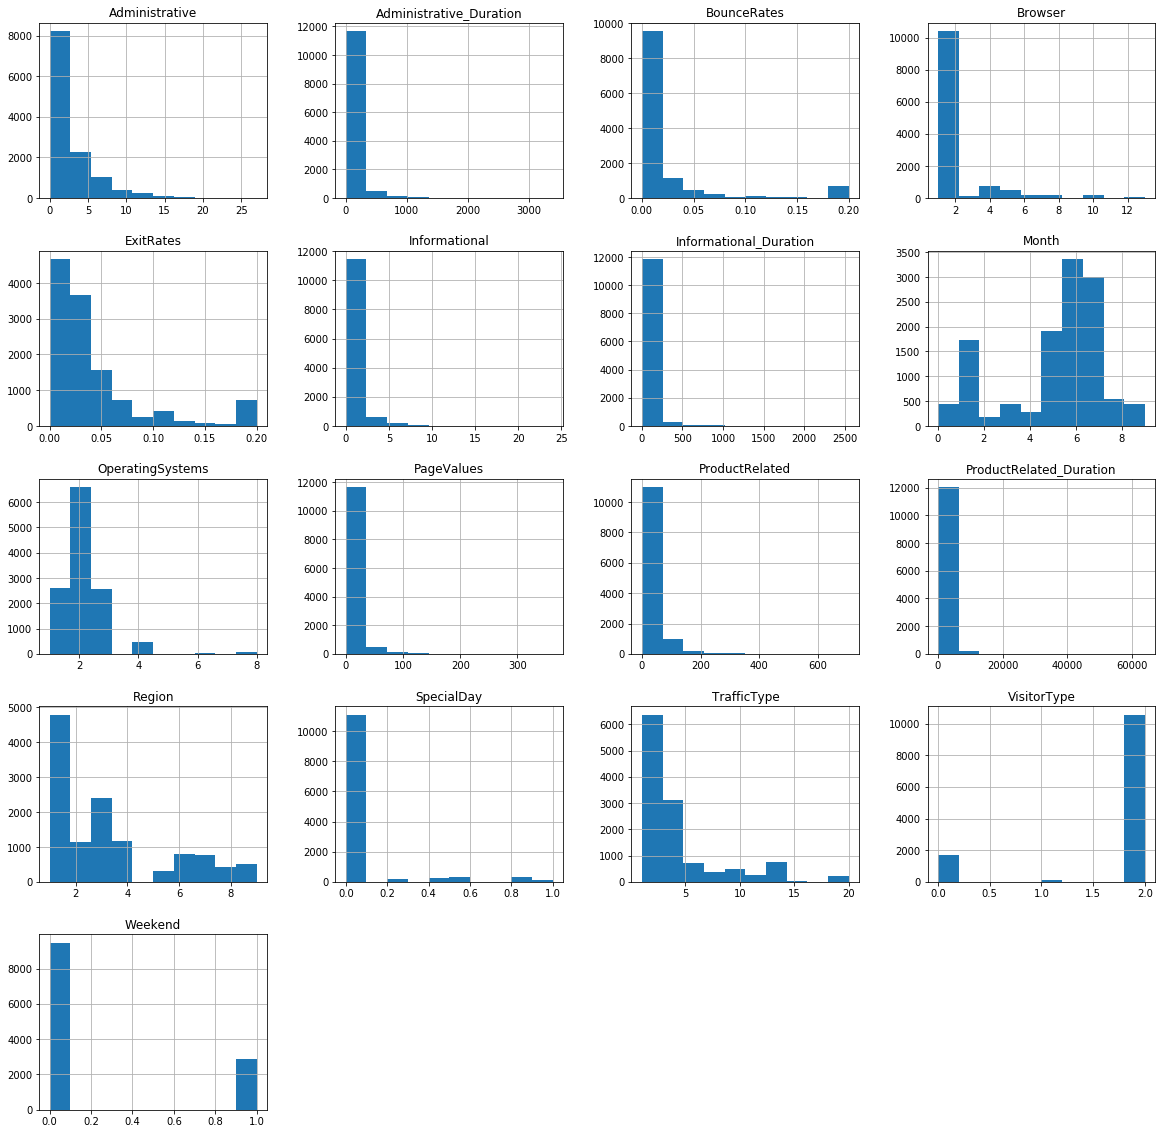

In [15]:
data2.drop(['Revenue'], axis=1).hist(figsize=(20,20))

In [8]:
columns_to_encode = ['VisitorType', 'Weekend', 'Month', 'Revenue']
label_encoder = preprocessing.LabelEncoder()
df = data2[columns_to_encode]
df = df.apply(label_encoder.fit_transform)
data2 = data2.drop(columns_to_encode, axis=1)
data2 = pd.concat([data2, df], axis=1)

In [3]:
data2.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [6]:
columns_to_encode = ['VisitorType', 'Weekend', 'Month', 'Revenue']
label_encoder = preprocessing.LabelEncoder()
df = data2[columns_to_encode]
df = df.apply(label_encoder.fit_transform)
data2 = data2.drop(columns_to_encode, axis=1)
data2 = pd.concat([data2, df], axis=1)
data2.head()
data2 = pd.get_dummies(data2,columns=['Month', 'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend'])
data2.describe(include='all')
# data2['OperatingSystems'].value_counts()
# data21 = pd.get_dummies(data2)
# data21.describe(include='all')
# data21.columns
# X2 = data21.drop(['Revenue'], axis=1)
# Y2 = data21[['Revenue']]
X2 = data2.drop(['Revenue'], axis=1)
Y2 = data2[['Revenue']]
print(X2.shape)
print(Y2.shape)

(12330, 75)
(12330, 1)


In [68]:
columns_to_cat = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates','PageValues','SpecialDay']
# data2.loc[data2['SpecialDay'] != 0, 'SpecialDay'] =1
for i in columns_to_cat:
    median = data2.loc[:, i].median()
    print(median)
    data2.loc[data2[i] <= median, i] = 0
    data2.loc[data2[i] > median, i] = 1
data2.describe(include='all')

7.5
0.0
598.9369047499999
0.0031124675
0.0251564025
0.0
0.0


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.00000,12330.00000,12330.00000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,0.499838,0.503569,0.195053,31.731468,0.50000,0.50000,0.50000,0.221411,0.101460,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,0.500020,1.270156,0.396257,44.475503,0.50002,0.50002,0.50002,0.415214,0.301949,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,0.00000,0.00000,0.00000,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,0.000000,0.000000,0.000000,18.000000,0.50000,0.50000,0.50000,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,1.000000,0.000000,0.000000,38.000000,1.00000,1.00000,1.00000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [19]:
data2['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

((11079, 18), (1251, 18))

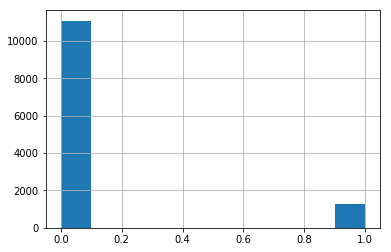

In [60]:
data2['SpecialDay'].hist()
df = data2[data2['SpecialDay'] == 0]
df1 = data2[data2['SpecialDay'] != 0]
df.shape, df1.shape


((9600, 18), (2730, 18))

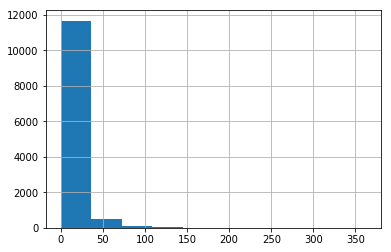

In [54]:
data2['PageValues'].hist()
df = data2[data2['PageValues'] == 0]
df1 = data2[data2['PageValues'] != 0]
df.shape, df1.shape


((6165, 18), (6165, 18))

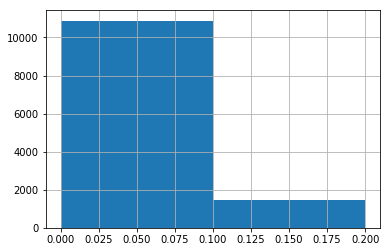

In [63]:
data2['ExitRates'].hist(bins=2)
df = data2[data2['ExitRates']  <= 0.025156]
df1 = data2[data2['ExitRates'] > 0.025156]
df.shape, df1.shape

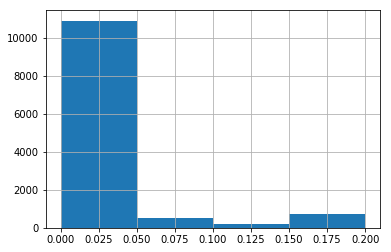

In [49]:
data2['BounceRates'].hist(bins=4)

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

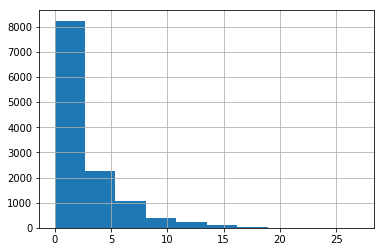

In [7]:
data2['Administrative'].hist()
data2['Administrative'].value_counts()


(6427, 18)

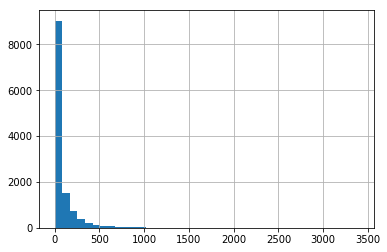

In [65]:
data2['Administrative_Duration'].hist(bins= 40)
data2[data2['Administrative_Duration'] != 0].shape

In [35]:
# data2['Informational_Duration'].hist(bins= 40)
# df = data2[data2['Informational_Duration']<100]
# df['Informational_Duration'].hist(bins= 40)
df = data2[data2['Informational_Duration'] == 0]
df1 = data2[data2['Informational_Duration'] != 0]
df.shape, df1.shape


((9925, 18), (2405, 18))

In [45]:
# data2.median()
df1 = data2[data2['ProductRelated_Duration'] <= 600]
df2 = data2[data2['ProductRelated_Duration'] > 600]

df1.shape, df2.shape

((6174, 18), (6156, 18))